In [119]:
import numpy as np
import matplotlib.pyplot as plt

from dedalus import public as de
from dedalus.extras.plot_tools import quad_mesh, pad_limits

import logging
logger = logging.getLogger(__name__)

In [120]:
# Bases and domain
x_basis = de.Fourier('x', 256, interval=(0,1), dealias=3/2)
y_basis = de.Fourier('y', 256, interval=(0,10), dealias=3/2)
domain = de.Domain([x_basis, y_basis], np.float64)

# Problem

#D*dx(cx) + dx(D)*cx + D*dy(cy) + dy(D)*cy - dt(c)

problem = de.IVP(domain, variables=['D', 'c', 'cx', 'cy'])
problem.add_equation("dt(c) = D*dx(cx) + dx(D)*cx + D*dy(cy) + dy(D)*cy")
problem.add_equation("cx - dx(c) = 0")
problem.add_equation("cy - dy(c) = 0")
problem.add_equation("dt(D) = 0")

# Build solver
solver = problem.build_solver(de.timesteppers.SBDF2)
solver.stop_wall_time = 6000000
solver.stop_iteration = 50

2019-09-24 18:45:28,267 pencil 0/1 INFO :: Building pencil matrix 1/128 (~1%) Elapsed: 0s, Remaining: 12s, Rate: 1.1e+01/s
2019-09-24 18:45:29,303 pencil 0/1 INFO :: Building pencil matrix 13/128 (~10%) Elapsed: 1s, Remaining: 10s, Rate: 1.1e+01/s
2019-09-24 18:45:30,463 pencil 0/1 INFO :: Building pencil matrix 26/128 (~20%) Elapsed: 2s, Remaining: 9s, Rate: 1.1e+01/s
2019-09-24 18:45:31,586 pencil 0/1 INFO :: Building pencil matrix 39/128 (~30%) Elapsed: 3s, Remaining: 8s, Rate: 1.1e+01/s
2019-09-24 18:45:32,710 pencil 0/1 INFO :: Building pencil matrix 52/128 (~41%) Elapsed: 5s, Remaining: 7s, Rate: 1.1e+01/s
2019-09-24 18:45:33,802 pencil 0/1 INFO :: Building pencil matrix 65/128 (~51%) Elapsed: 6s, Remaining: 5s, Rate: 1.2e+01/s
2019-09-24 18:45:34,896 pencil 0/1 INFO :: Building pencil matrix 78/128 (~61%) Elapsed: 7s, Remaining: 4s, Rate: 1.2e+01/s
2019-09-24 18:45:35,936 pencil 0/1 INFO :: Building pencil matrix 91/128 (~71%) Elapsed: 8s, Remaining: 3s, Rate: 1.2e+01/s
2019-09-

In [121]:
# Initial conditions
x = domain.grid(0)
y = domain.grid(1)
c = solver.state['c']
cx = solver.state['cx']
cy = solver.state['cy']
D = solver.state['D']

In [122]:
c['g'] = x**2 + 10
c.differentiate(0, out=cx)
c.differentiate(1, out=cy)
D['g'] = 2

In [123]:
# Store data for final plot
solver.stop_wall_time = 100000
c.set_scales(1)
c_list = [np.copy(c['g'])]
t_list = [solver.sim_time]

# Main loop
dt = 2e-3
while solver.ok:
    solver.step(dt)
    if solver.iteration % 1 == 0:
        c.set_scales(1)
        c_list.append(np.copy(c['g']))
        t_list.append(solver.sim_time)
    if solver.iteration % 100 == 0:
        logger.info('Iteration: %i, Time: %e, dt: %e' %(solver.iteration, solver.sim_time, dt))

2019-09-24 18:45:40,625 solvers 0/1 INFO :: Stop iteration reached.


[[10.0019455  10.0019455  10.0019455  ... 10.0019455  10.0019455
  10.0019455 ]
 [ 9.99806976  9.99806976  9.99806976 ...  9.99806976  9.99806976
   9.99806976]
 [10.00200653 10.00200653 10.00200653 ... 10.00200653 10.00200653
  10.00200653]
 ...
 [10.97475433 10.97475433 10.97475433 ... 10.97475433 10.97475433
  10.97475433]
 [10.98638153 10.98638153 10.98638153 ... 10.98638153 10.98638153
  10.98638153]
 [10.99025726 10.99025726 10.99025726 ... 10.99025726 10.99025726
  10.99025726]]
[[ 433.36002049  433.36002049  433.36002049 ...  433.36002049
   433.36002049  433.36002049]
 [ -77.52225072  -77.52225072  -77.52225072 ...  -77.52225072
   -77.52225072  -77.52225072]
 [  42.78573383   42.78573383   42.78573383 ...   42.78573383
    42.78573383   42.78573383]
 ...
 [ -21.89110982  -21.89110982  -21.89110982 ...  -21.89110982
   -21.89110982  -21.89110982]
 [  98.85491521   98.85491521   98.85491521 ...   98.85491521
    98.85491521   98.85491521]
 [-414.66125446 -414.66125446 -414.6612

"\nplt.figure()\nplt.pcolormesh(X, Y, c_array[0], cmap='RdBu_r')\nplt.axis(pad_limits(X, Y))\nplt.colorbar()\nplt.xlabel('x')\nplt.ylabel('y')\nplt.title('Initial')\nplt.savefig('initial.png')\nplt.figure()\nplt.pcolormesh(X, Y, c_array[-1], cmap='RdBu_r')\nplt.axis(pad_limits(X, Y))\nplt.colorbar()\nplt.xlabel('x')\nplt.ylabel('y')\nplt.title('Final')\nplt.savefig('Final.png')\n"

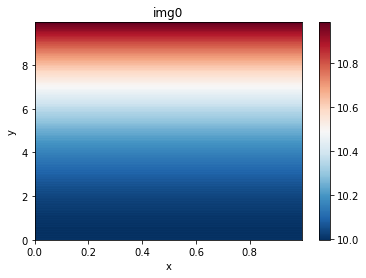

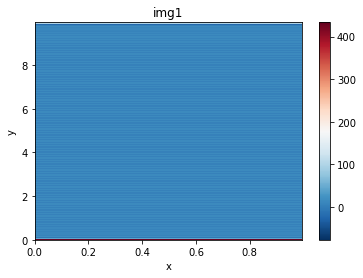

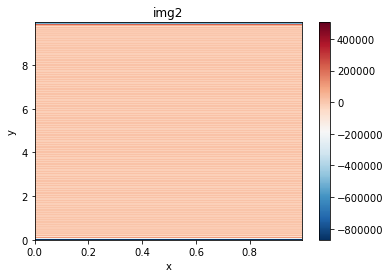

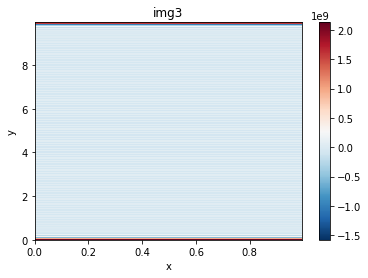

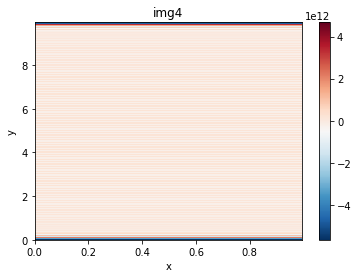

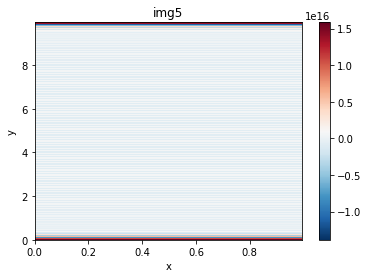

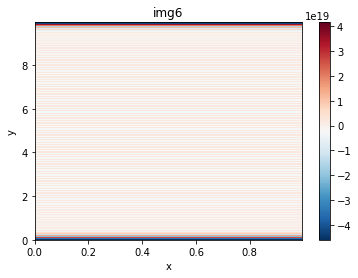

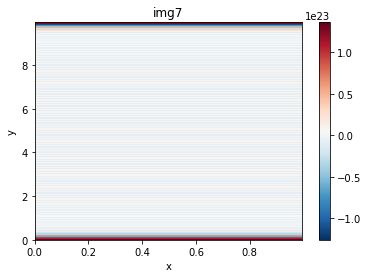

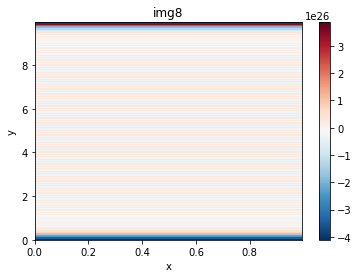

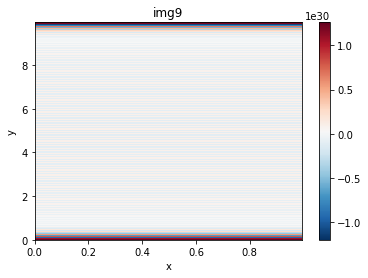

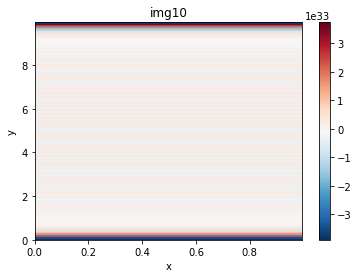

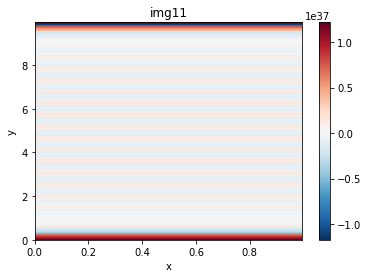

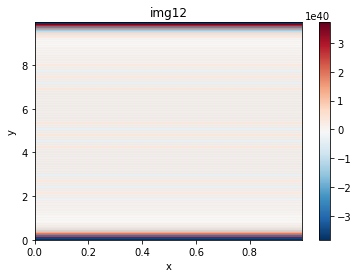

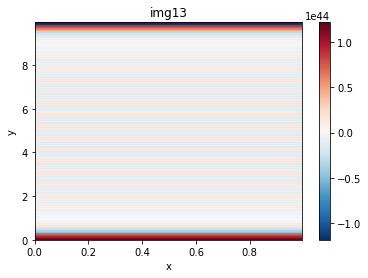

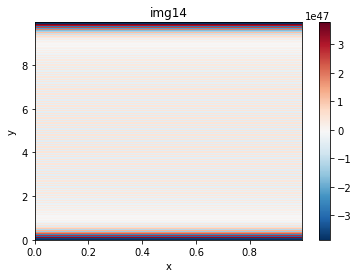

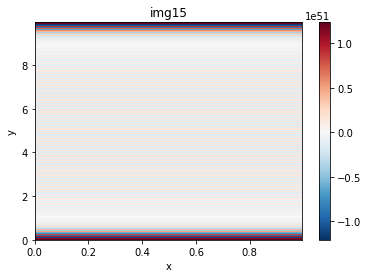

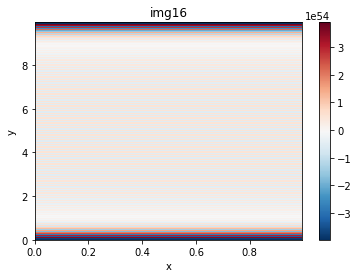

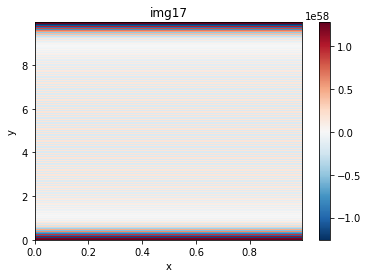

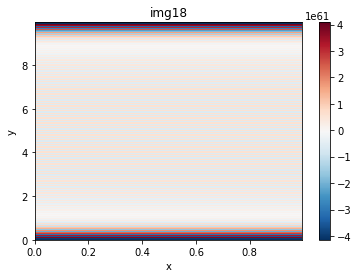

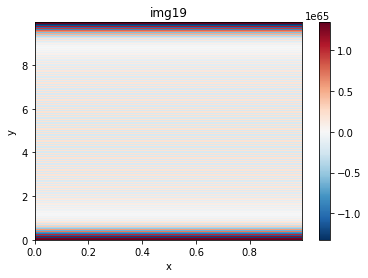

In [124]:
# Create space-time plot
c_array = np.array(c_list)
t_array = np.array(t_list)
print(c_array[0])
print(c_array[1])
#xmesh, ymesh = quad_mesh(x=x, y=y)
X, Y = np.meshgrid(x, y)
for i in range(0,20):
    plt.figure()
    plt.pcolormesh(X, Y, c_array[i], cmap='RdBu_r')
    plt.axis(pad_limits(X, Y))
    plt.colorbar()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('img'+str(i))
    plt.savefig('img'+str(i)+'.png')
"""
plt.figure()
plt.pcolormesh(X, Y, c_array[0], cmap='RdBu_r')
plt.axis(pad_limits(X, Y))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial')
plt.savefig('initial.png')
plt.figure()
plt.pcolormesh(X, Y, c_array[-1], cmap='RdBu_r')
plt.axis(pad_limits(X, Y))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Final')
plt.savefig('Final.png')
"""